In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('../datasets/derby-10.5.1.1.csv')

df.head()

,File,CountDeclMethodPrivate,AvgLineCode,CountLine,MaxCyclomatic,CountDeclMethodDefault,AvgEssential,CountDeclClassVariable,SumCyclomaticStrict,AvgCyclomatic,...,OWN_LINE,OWN_COMMIT,MINOR_COMMIT,MINOR_LINE,MAJOR_COMMIT,MAJOR_LINE,HeuBug,HeuBugCount,RealBug,RealBugCount
0,java/build/org/apache/derbyBuild/classlister.java,0,46,741,42,0,5,1,135,10,...,0.975709,0.0,0,1,0,2,False,0,False,0
1,java/build/org/apache/derbyBuild/ClassSizeCraw...,3,51,315,17,0,1,0,34,8,...,0.933333,0.0,0,1,0,2,False,0,False,0
2,java/build/org/apache/derbyBuild/eclipse/Derby...,2,13,186,3,0,1,12,5,2,...,0.967742,0.0,0,1,0,1,False,0,False,0
3,java/build/org/apache/derbyBuild/javadoc/DiskL...,0,4,137,4,0,1,0,15,1,...,0.956204,0.0,0,1,0,1,False,0,False,0
4,java/build/org/apache/derbyBuild/javadoc/EndFo...,0,4,134,4,0,1,0,15,1,...,0.955224,0.0,0,1,0,1,False,0,False,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2705 entries, 0 to 2704
Data columns (total 70 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   File                       2705 non-null   object 
 1   CountDeclMethodPrivate     2705 non-null   int64  
 2   AvgLineCode                2705 non-null   int64  
 3   CountLine                  2705 non-null   int64  
 4   MaxCyclomatic              2705 non-null   int64  
 5   CountDeclMethodDefault     2705 non-null   int64  
 6   AvgEssential               2705 non-null   int64  
 7   CountDeclClassVariable     2705 non-null   int64  
 8   SumCyclomaticStrict        2705 non-null   int64  
 9   AvgCyclomatic              2705 non-null   int64  
 10  AvgLine                    2705 non-null   int64  
 11  CountDeclClassMethod       2705 non-null   int64  
 12  AvgLineComment             2705 non-null   int64  
 13  AvgCyclomaticModified      2705 non-null   int64

In [3]:
df = df.drop(columns=['HeuBug', 'HeuBugCount', 'RealBugCount'])

In [4]:
df.shape

(2705, 67)

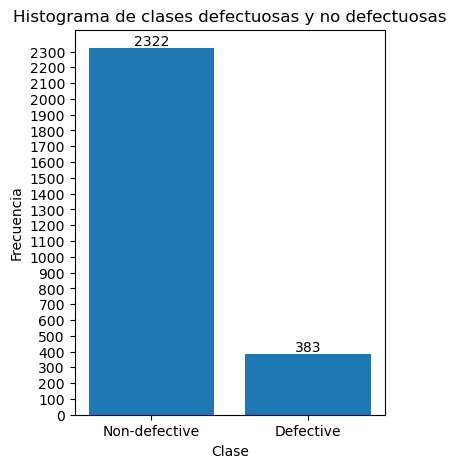

In [5]:
import matplotlib.pyplot as plt
#Defective and Non-defective Class histogram

# Count the occurrences of each class
class_counts = df['RealBug'].value_counts()

# Plot the histogram with increased height
plt.figure(figsize=(4, 5))
bars = plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.title('Histograma de clases defectuosas y no defectuosas')
plt.xticks([0, 1], ['Non-defective', 'Defective'])

# show more numbers in frequency (y axis)
plt.gca().set_yticks(range(0, class_counts.max() + 50, 100))

# Add value labels on top of bars
plt.bar_label(bars, labels=[f'{val}' for val in class_counts.values])

# show the grid
# plt.grid(axis='y')
plt.show()


In [6]:
class_counts

RealBug
False    2322
True      383
Name: count, dtype: int64

<Axes: xlabel='RealBug', ylabel='CountLineCode'>

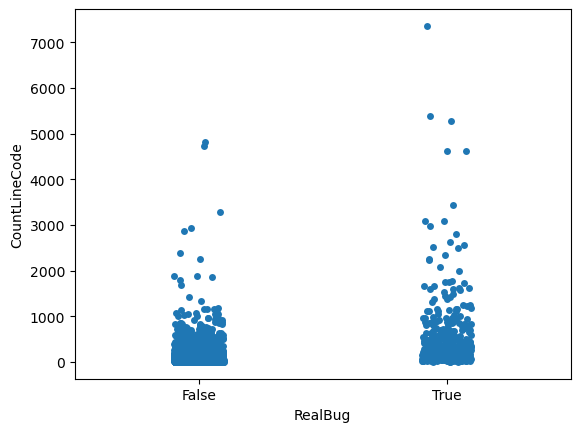

In [7]:
# Dispersion plot of class Defective
import seaborn as sns

sns.stripplot(x='RealBug', y='CountLineCode', data=df, jitter=True)

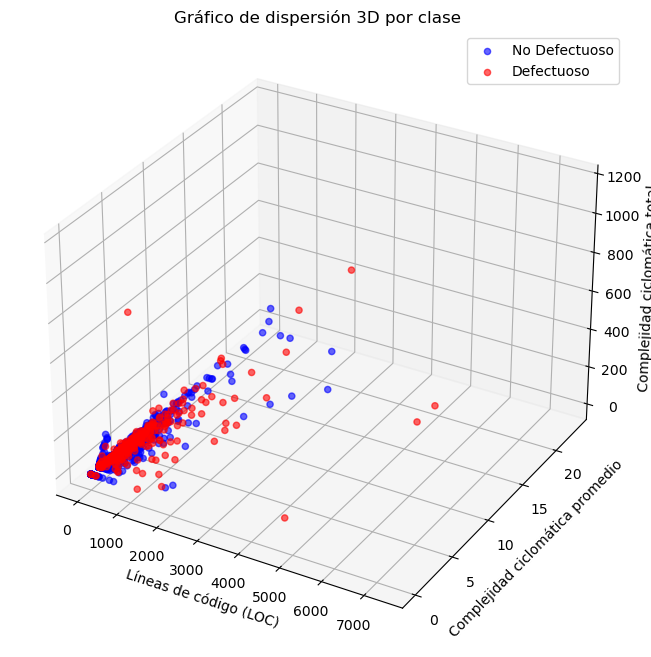

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

# Separar por clase
defective = df[df['RealBug'] == 1]
non_defective = df[df['RealBug'] == 0]

# Graficar cada clase con diferente color
ax.scatter(non_defective['CountLineCode'], 
           non_defective['AvgCyclomatic'], 
           non_defective['SumCyclomatic'],
           c='blue', label='No Defectuoso', alpha=0.6)

ax.scatter(defective['CountLineCode'], 
           defective['AvgCyclomatic'], 
           defective['SumCyclomatic'],
           c='red', label='Defectuoso', alpha=0.6)

ax.set_xlabel('Líneas de código (LOC)')
ax.set_ylabel('Complejidad ciclomática promedio')
ax.set_zlabel('Complejidad ciclomática total')
ax.set_title('Gráfico de dispersión 3D por clase')
ax.legend()

plt.show()

## Preprocesamiento

- isNull / Missing values
- Duplicados
- Outlaiers ( no porque el metodo HCBOU de balanceo no lo recomienda)
- Particion Train/Test
- Transformación de los datos - Normalización/Estandarización (StandarScaler)
- Balanceo de clases - HCBOU
- Seleccion de caracteristicas (arbol de decision - CABOOST) 
- Reduccion de Dimensionalidad (PCA)

### Missing Values

In [9]:
df.isnull().sum()

File                      0
CountDeclMethodPrivate    0
AvgLineCode               0
CountLine                 0
MaxCyclomatic             0
                         ..
MINOR_COMMIT              0
MINOR_LINE                0
MAJOR_COMMIT              0
MAJOR_LINE                0
RealBug                   0
Length: 67, dtype: int64

### Duplicated

In [10]:
df.duplicated().sum()

0

### Split Train/Test 80/20

In [11]:
# split train and test
from sklearn.model_selection import train_test_split

X = df.drop(columns=['RealBug'])
y = df['RealBug']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
print(X_train.shape)
print(X_test.shape)

(2164, 66)
(541, 66)


### Normalización

In [13]:
from sklearn.preprocessing import StandardScaler

X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
X_train_numeric_scaled = pd.DataFrame(scaler.fit_transform(X_train_numeric), columns=X_train_numeric.columns)

In [14]:
X_train_numeric.describe()

,CountDeclMethodPrivate,AvgLineCode,CountLine,MaxCyclomatic,CountDeclMethodDefault,AvgEssential,CountDeclClassVariable,SumCyclomaticStrict,AvgCyclomatic,AvgLine,...,ADEV,DDEV,Added_lines,Del_lines,OWN_LINE,OWN_COMMIT,MINOR_COMMIT,MINOR_LINE,MAJOR_COMMIT,MAJOR_LINE
count,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,...,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.0,2164.000000,2164.000000,2164.000000
mean,1.728281,12.350739,376.261553,6.142791,1.395564,1.181608,2.940850,33.992144,2.201017,20.484750,...,0.283734,0.210721,18.997689,1.972274,0.895978,0.185921,0.0,1.621996,0.210721,1.200092
std,5.215124,25.045006,644.040547,8.729904,4.432751,0.707149,14.532035,67.785535,2.023847,42.478868,...,0.809613,0.463115,110.141302,15.428602,0.138211,0.384820,0.0,0.835192,0.463115,1.665283
min,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.252747,0.000000,0.0,1.000000,0.000000,0.000000
25%,0.000000,4.000000,93.000000,1.000000,0.000000,1.000000,0.000000,5.750000,1.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.863616,0.000000,0.0,1.000000,0.000000,0.000000
50%,0.000000,8.000000,174.000000,3.000000,0.000000,1.000000,0.000000,13.000000,2.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.947368,0.000000,0.0,1.000000,0.000000,1.000000
75%,1.000000,15.000000,390.000000,7.000000,1.000000,1.000000,1.000000,33.000000,3.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,2.000000,0.000000,2.000000
max,76.000000,895.000000,10134.000000,87.000000,87.000000,11.000000,324.000000,1154.000000,23.000000,1679.000000,...,10.000000,5.000000,3081.000000,407.000000,1.000000,1.000000,0.0,7.000000,5.000000,14.000000


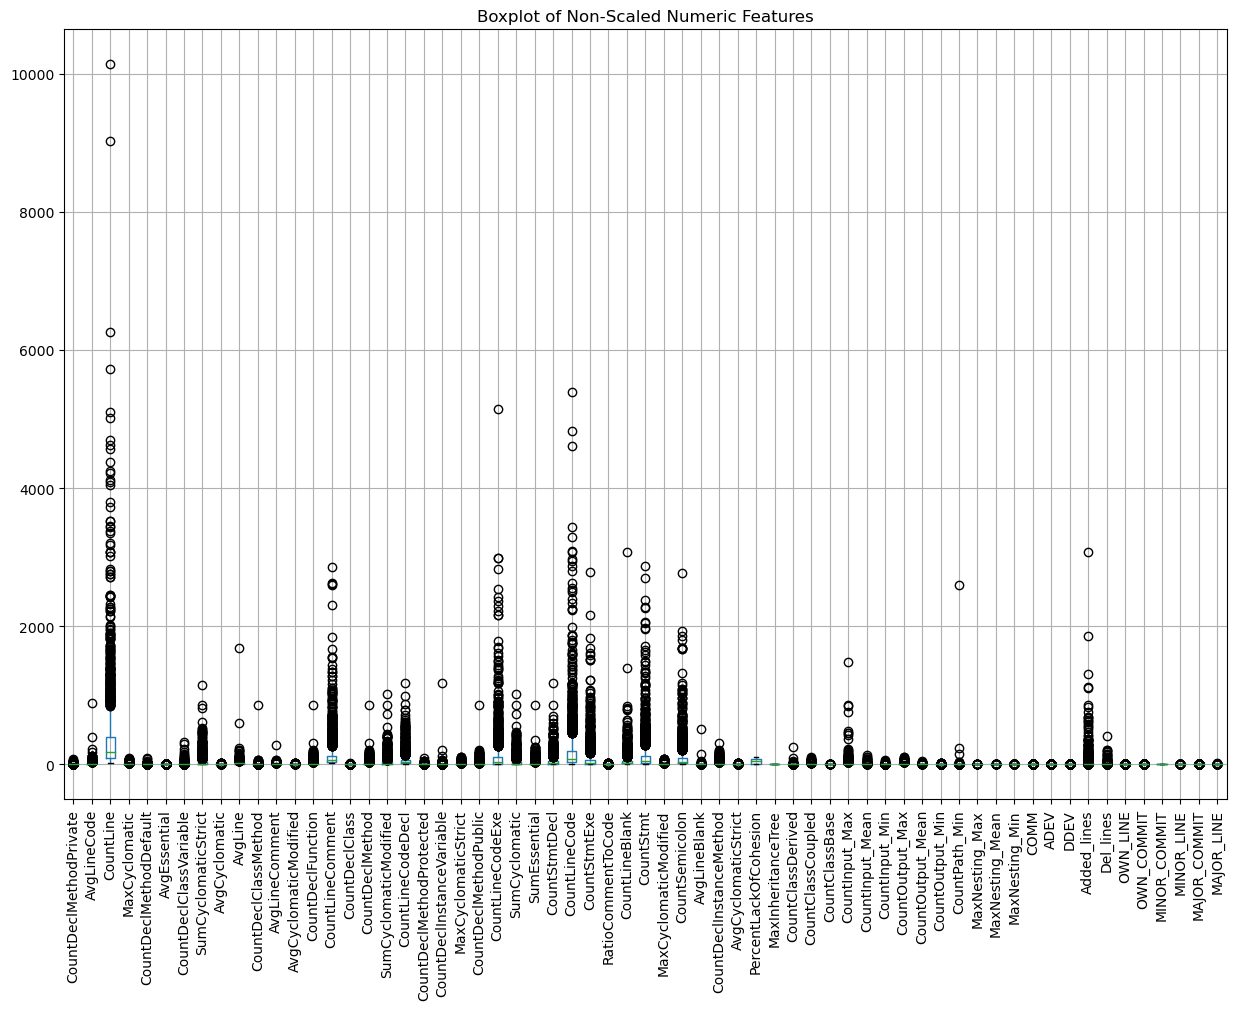

In [15]:
plt.figure(figsize=(15, 10))
X_train_numeric.drop(columns=['CountPath_Max', 'CountPath_Mean']).boxplot()
plt.title('Boxplot of Non-Scaled Numeric Features')
plt.xticks(rotation=90)
plt.show()

In [16]:
X_train_numeric_scaled.describe()

,CountDeclMethodPrivate,AvgLineCode,CountLine,MaxCyclomatic,CountDeclMethodDefault,AvgEssential,CountDeclClassVariable,SumCyclomaticStrict,AvgCyclomatic,AvgLine,...,ADEV,DDEV,Added_lines,Del_lines,OWN_LINE,OWN_COMMIT,MINOR_COMMIT,MINOR_LINE,MAJOR_COMMIT,MAJOR_LINE
count,2.164000e+03,2.164000e+03,2.164000e+03,2.164000e+03,2.164000e+03,2.164000e+03,2.164000e+03,2.164000e+03,2.164000e+03,2.164000e+03,...,2.164000e+03,2.164000e+03,2.164000e+03,2.164000e+03,2.164000e+03,2.164000e+03,2164.0,2.164000e+03,2.164000e+03,2.164000e+03
mean,9.850408e-18,-7.387806e-18,-2.873036e-17,-1.600691e-17,1.703300e-17,-1.149214e-17,-1.723821e-17,-3.201382e-17,6.156505e-17,2.996166e-17,...,4.104337e-17,-6.156505e-18,-1.641735e-18,2.790949e-17,3.940163e-17,-1.395474e-17,0.0,1.149214e-17,-6.156505e-18,-2.544689e-17
std,1.000231e+00,1.000231e+00,1.000231e+00,1.000231e+00,1.000231e+00,1.000231e+00,1.000231e+00,1.000231e+00,1.000231e+00,1.000231e+00,...,1.000231e+00,1.000231e+00,1.000231e+00,1.000231e+00,1.000231e+00,1.000231e+00,0.0,1.000231e+00,1.000231e+00,1.000231e+00
min,-3.314745e-01,-4.932558e-01,-5.486350e-01,-7.038120e-01,-3.149029e-01,-1.671334e+00,-2.024169e-01,-5.015819e-01,-1.087792e+00,-4.823454e-01,...,-3.505373e-01,-4.551125e-01,-1.725246e-01,-1.278618e-01,-4.655056e+00,-4.832497e-01,0.0,-7.449062e-01,-4.551125e-01,-7.208204e-01
25%,-3.314745e-01,-3.335064e-01,-4.399211e-01,-5.892367e-01,-3.149029e-01,-2.568768e-01,-2.024169e-01,-4.167360e-01,-5.935696e-01,-2.939729e-01,...,-3.505373e-01,-4.551125e-01,-1.725246e-01,-1.278618e-01,-2.342068e-01,-4.832497e-01,0.0,-7.449062e-01,-4.551125e-01,-7.208204e-01
50%,-3.314745e-01,-1.737570e-01,-3.141235e-01,-3.600862e-01,-3.149029e-01,-2.568768e-01,-2.024169e-01,-3.097563e-01,-9.934697e-02,-1.526936e-01,...,-3.505373e-01,-4.551125e-01,-1.725246e-01,-1.278618e-01,3.719087e-01,-4.832497e-01,0.0,-7.449062e-01,-4.551125e-01,-1.201830e-01
75%,-1.396802e-01,1.058044e-01,2.133658e-02,9.821494e-02,-8.925726e-02,-2.568768e-01,-1.335875e-01,-1.463990e-02,3.948756e-01,1.063186e-01,...,-3.505373e-01,-4.551125e-01,-1.725246e-01,-1.278618e-01,7.528027e-01,-4.832497e-01,0.0,4.526993e-01,-4.551125e-01,4.804544e-01
max,1.424489e+01,3.525067e+01,1.515432e+01,9.264237e+00,1.931627e+01,1.388769e+01,2.209831e+01,1.652663e+01,1.027933e+01,3.905233e+01,...,1.200390e+01,1.034383e+01,2.780710e+01,2.625781e+01,7.528027e-01,2.115966e+00,0.0,6.440727e+00,1.034383e+01,7.688103e+00


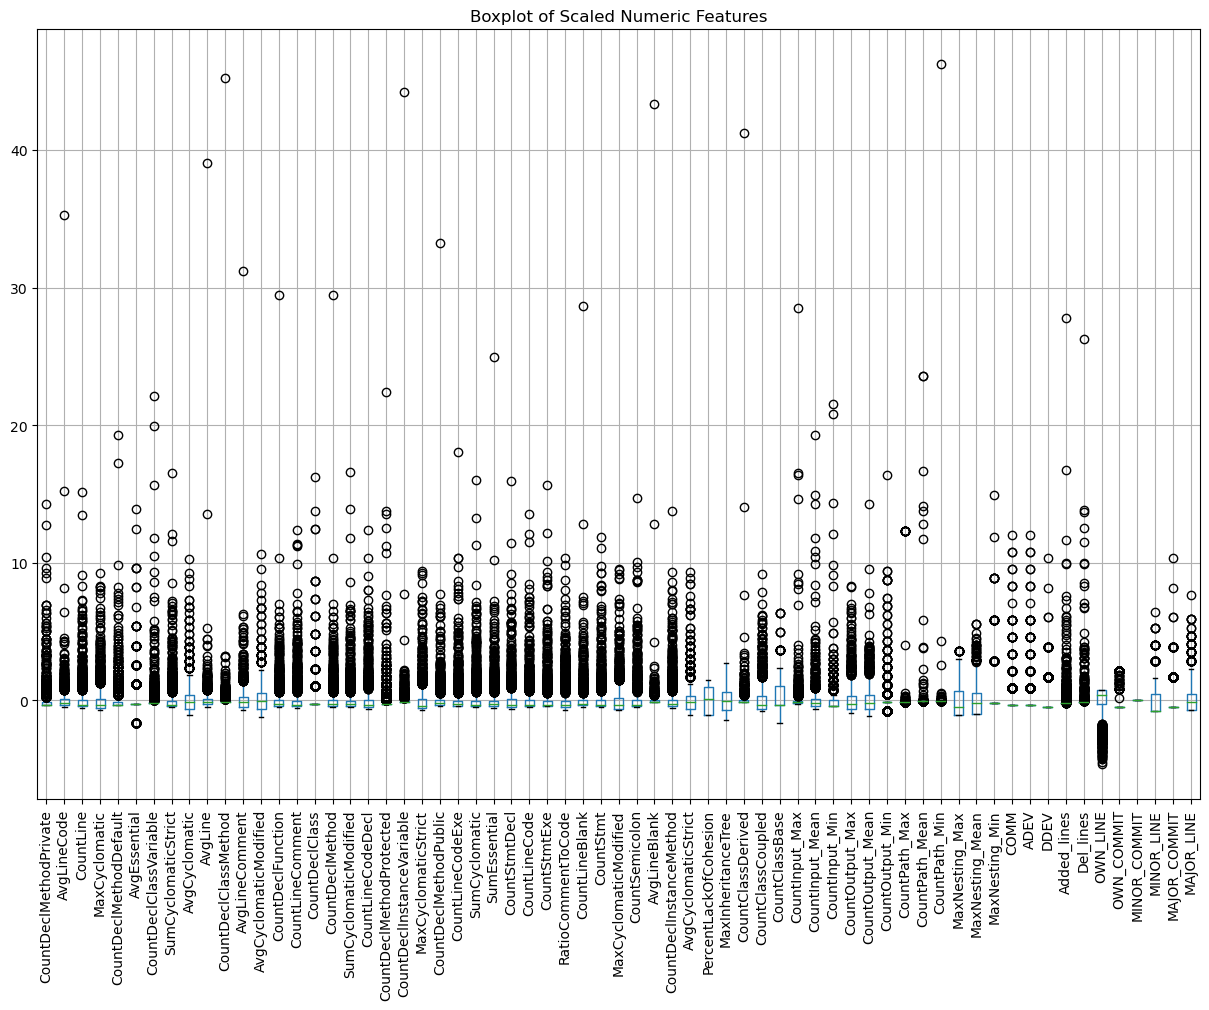

In [17]:
plt.figure(figsize=(15, 10))
X_train_numeric_scaled.boxplot()
plt.title('Boxplot of Scaled Numeric Features')
plt.xticks(rotation=90)
plt.show()